# Data Types

In addition to all of the structures and shapes our data may take, there are several different types of data we will encounter.  We'll discuss the properties of each in more detail when we get to the {doc}`../Chapter6/machine_learning` section, so here we'll only introduce the types and cover a high level understanding of the following.

- Cross sectional
- Time series
- Panel
- Text

Most of the data will fall into the category of "structured" data, think rows and columns (like Excel), with Text data being the most common exception usually coming in "unstructred" blocks of text.  There are other more exotic data, but this will cover the common ones you'll deal with the most often.

**<h3>Cross Sectional</h3>**

The one is very common and you'll run into it often.  Think of **cross sectional** as a snapshot of some collection of data points at a given point in time.

```{note}
Cross Sectional data refers to variables and measures recorded at the same point in time.
```

Recall our Iris data set from earlier?  It's a classic example of cross-sectional data because it's a collection of measurements (lengths and widths) for multiple flowers, all recorded at the same time.

In [48]:
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dat = sns.load_dataset('iris')
dat.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
57,4.9,2.4,3.3,1.0,versicolor
126,6.2,2.8,4.8,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
136,6.3,3.4,5.6,2.4,virginica
77,6.7,3.0,5.0,1.7,versicolor
9,4.9,3.1,1.5,0.1,setosa
51,6.4,3.2,4.5,1.5,versicolor
90,5.5,2.6,4.4,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
13,4.3,3.0,1.1,0.1,setosa


It often helps to understand your data through graphs and visualizations, as you'll learn soon when we get to the Exploratory Data Analysis section, so let's plot a couple of the variables in this set and look at the relationship between `petal_width` and `petal_length`.

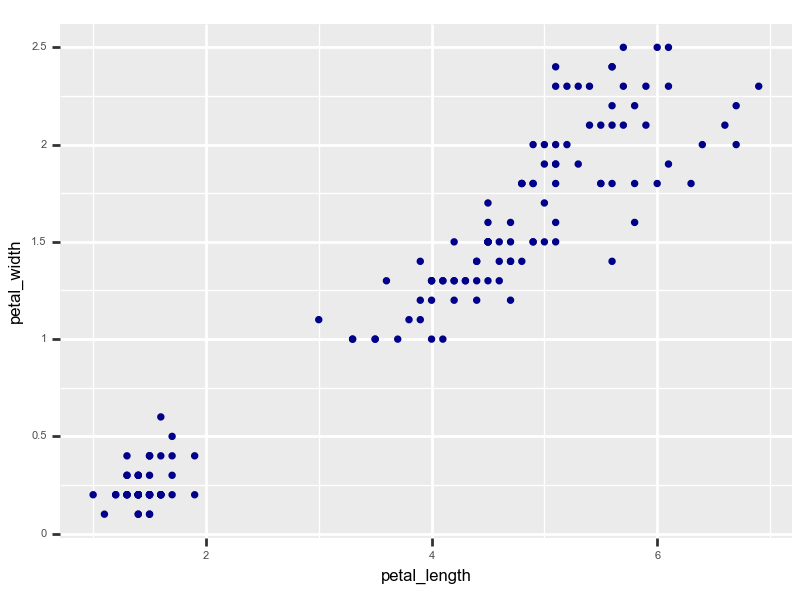

In [502]:
p = (ggplot(dat, aes(x = 'petal_length', y = 'petal_width')) +
        geom_point(color = "darkblue", size = .5) +
        theme(plot_title = element_text(size = 8),
        axis_text_x = element_text(size = 4),
        axis_text_y = element_text(size = 4),
        axis_title = element_text(size = 6),
        figure_size = (4,3)))
p.draw(show = False)

**<h3>Time Series</h3>**


When we're dealing with what's known as _univariate_ (only a single dependent variable), the data tends to be very simple.  We usually just have a column or two with categorical fields like "Customer" or "Region", then some kind of time variable such as "Day", "Month", or "Year", and then some numeric value of interest like "Sales", "Profit", or maybe "Price".  This would be an example of **time series** data.

```{note}
Time Series data refers to a subject and variables recorded at different points in time (usually at regular intervals).
```

The key point of distinction for time series data is repeated measurements of data at multiple points in time.  Below you can see an example with a 1 year sample of prices for the Dow Jones Industrial Average from 1968 by Month.

In [50]:
import seaborn.objects as so
dat = sns.load_dataset("dowjones")
dat[-12:]

,Date,Price
637,1968-01-01,884.77
638,1968-02-01,847.20
639,1968-03-01,834.76
640,1968-04-01,893.37
641,1968-05-01,905.22
642,1968-06-01,906.82
643,1968-07-01,905.32
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47


Time series data is a fun one to display graphically.  Time across the x-axis, and the numeric value in the y-axis.  You'll build these kinds of graphs frequently when you get into real time series projects.

<br>

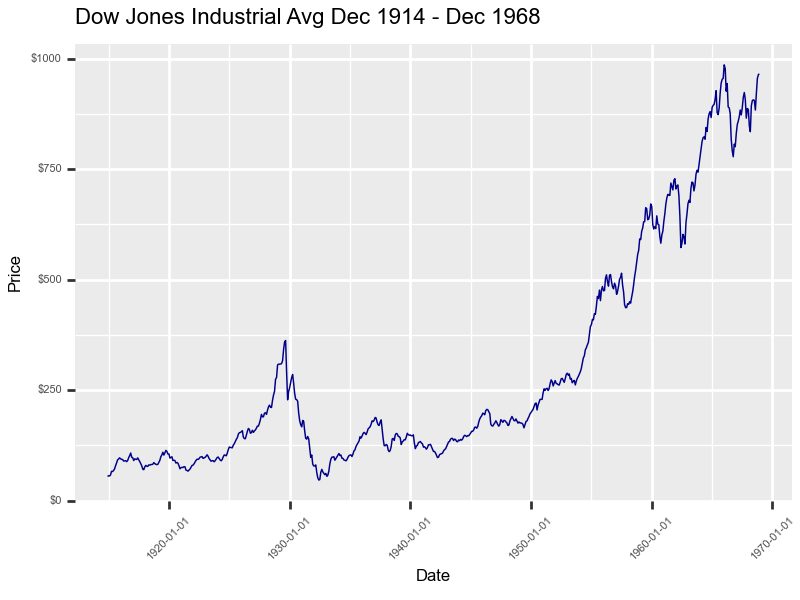

In [56]:
from mizani.formatters import currency_format

p = (ggplot(dat, aes(x = 'Date', y = 'Price')) +
        geom_line(color = "darkblue", size = .3) +
        ggtitle("Dow Jones Industrial Avg Dec 1914 - Dec 1968") +
        theme(plot_title = element_text(size = 8),
              axis_text_x = element_text(rotation = 45, size = 4),
              axis_text_y = element_text(size = 4),
              axis_title = element_text(size = 6),
              figure_size = (4,3)) +
              scale_y_continuous(labels = currency_format("$", digits = 0)))

p.draw(show = False)

**<h3>Panel</h3>**

Next up, **Panel** data.  We've already seen an example of panel data as well if you recall from a previous section.  Remember the Gas Consumption dataset?  Recall how the unit of analysis was "Gas Consumption, by Country, by Year"?  Well, that's panel data.  Multiple cross-sections of subjects recorded at multiple points in time.

```{note}
Panel, or longitudinal data refers to variables and measures across multiple cross sections at different points in time.
```

Sounds confusing, but it's the logical next step going from a single slice, or cross sectional, then to multiple points in time with time series, all building up to put them together as we get with panel data.

Let's see it in action.

In [369]:
from pydataset import data
dat = data("Gasoline")
dat

,country,year,lgaspcar,lincomep,lrpmg,lcarpcap
1,AUSTRIA,1960,4.173244,-6.474277,-0.334548,-9.766840
2,AUSTRIA,1961,4.100989,-6.426006,-0.351328,-9.608622
3,AUSTRIA,1962,4.073177,-6.407308,-0.379518,-9.457257
4,AUSTRIA,1963,4.059509,-6.370679,-0.414251,-9.343155
5,AUSTRIA,1964,4.037689,-6.322247,-0.445335,-9.237739
...,...,...,...,...,...,...
338,U.S.A.,1974,4.798626,-5.328694,-1.231467,-7.617558
339,U.S.A.,1975,4.804932,-5.346190,-1.200377,-7.607010
340,U.S.A.,1976,4.814891,-5.297946,-1.154682,-7.574748
341,U.S.A.,1977,4.811032,-5.256606,-1.175910,-7.553458


Just as before, plotting our data really helps us to visualize what we have and spot the differences between categorical groups.

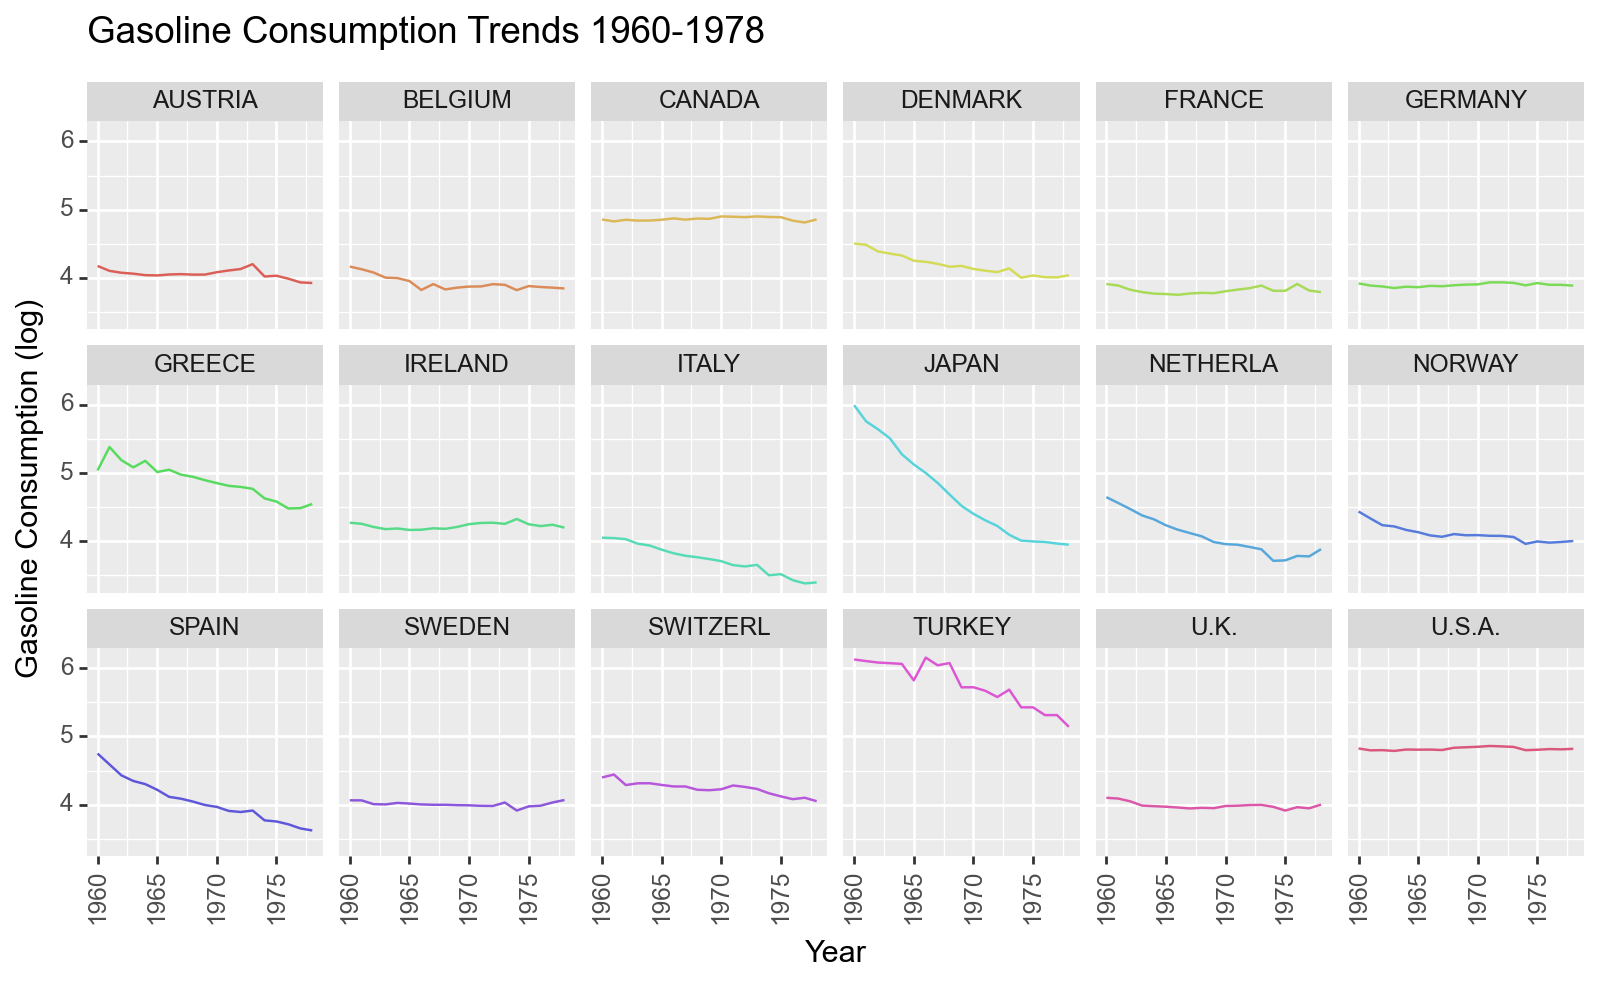

In [371]:
p = (ggplot(dat, aes(x = "year", y = "lgaspcar", color = "country")) +
        geom_line() +
        scale_color_discrete(guide = False) +
        xlab("Year") +
        ylab("Gasoline Consumption (log)") +
        ggtitle("Gasoline Consumption Trends 1960-1978") +
        theme(axis_text_x = element_text(rotation = 90),
                            figure_size = (8, 5)) +
        facet_wrap("country", ncol = 6))

p.draw(show = False)

#palette = sns.color_palette("husl", 8)

#p = sns.FacetGrid(dat, col = "country", hue = "country", col_wrap = 5, palette = palette)
#p.map(sns.lineplot, "year", "lgaspcar")
#p.set_titles(template = "{col_name}", size = 16)
#p.set_axis_labels("", "Gasoline Consumption (log)");

**<h3>Text</h3>**

Text data can come in a variety of formats.  It can be in a corpus, which is a collection of text or audio, a simple column in a file with one or a few words, or you might see it as below, which is free form text in the form of sentences.  Let's read in a public dataset from the UCI Repository {cite}`UCI_2024` listing email text for spam classification.

```{note}
Text data refers to any sort of written data stored in a text/character format.
```

Let's print out the first 15 records in the data.

In [64]:
import pandas as pd
# Read in SMS Spam Collection text from Github
url = 'https://github.com/bradybr/practical-data-science-and-ml/blob/main/datasets/SMS%20Spam%20Collection.csv?raw=true'
dat = pd.read_csv(url, encoding = 'unicode_escape')['text']
dat.head(15)

0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
5     FreeMsg Hey there darling it's been 3 week's n...
6     Even my brother is not like to speak with me. ...
7     As per your request 'Melle Melle (Oru Minnamin...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
10    I'm gonna be home soon and i don't want to tal...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
13    I've been searching for the right words to tha...
14                  I HAVE A DATE ON SUNDAY WITH WILL!!
Name: text, dtype: object

We can see it's text in long form written sentences.  There are many things we could do to start preprocessing this data, but let's make it simple and jump right into looking at frequency counts.  Often one on the analyses you'll want to look at with text data is the number of times, occurrences, or frequency, in which a word appears in a corpus of data.  Let's run the counts and print out the 10 most used words in this spam data.

In [66]:
# Concatenate and count the frequencies for each word
sentence_ls = dat.to_list()[1:100]
word_ls = ','.join(sentence_ls).split()
word_freq = [word_ls.count(w) for w in word_ls]

# Create dataframe
word_freq_df = pd.DataFrame(list(zip(word_ls, word_freq))).rename(columns = {0: 'word', 1: 'frequency'})
word_freq_df = word_freq_df.drop_duplicates()
word_freq_df = word_freq_df.sort_values(by = ['frequency'], ascending = False)
word_freq_df.head(10)

,word,frequency
12,to,53
71,you,42
43,I,30
9,a,26
63,and,22
163,the,22
73,for,18
184,i,17
102,your,16
7,in,15


Hmm... maybe not so interesting or useful yet as you can see a lot of the top words are what we call "stop" words, or uninformative.  They give us little information in regards to subjects or context.  We would normally clean the data up a bit first before analyzing, but hopefully you can at least see what we're after.

Let's plot the top 50 words and see if we start to see a bit more interesting words show up.

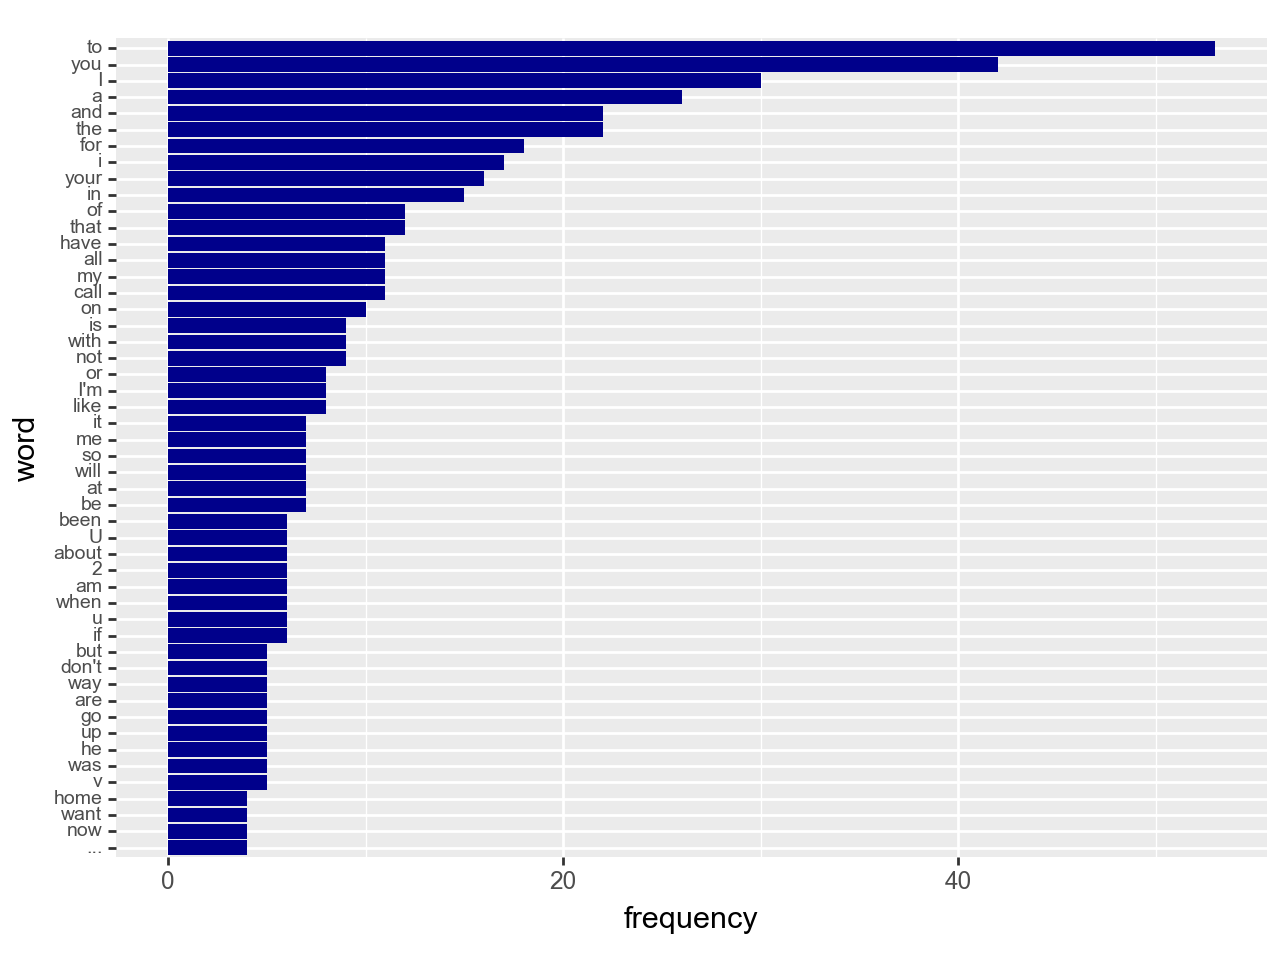

In [68]:
# Plot top 50 word frequencies
p = (ggplot(word_freq_df[0:50], aes(x = 'reorder(word, frequency)', y = 'frequency')) +
         geom_bar(stat = 'identity', fill = 'darkblue') +
         xlab('word') +
         theme(axis_text_y = element_text(size = 7)) +
         coord_flip())

p.draw(show = False)

We've plotted the most commonly used words in all of the emails, but notice how many of the words are still uninformative?  When you get into working with text for real, you'll learn that there's a _ton_ of preprocessing that needs to happen before you can properly analzye your data.  Simply expanding from 10 to 50 wasn't enough.  We'll need to remove stop words, deal with special characters and punctutations, truncate words down to their root, and likely need to look at combinations of words in sequences as well!

This at least gives you a basic feel for looking at text, doing some simple manipulations, and plotting basic count frequencies.  More to come.

<h3>What Did We Learn?</h3>

I know this was a long section, but hopefully you're starting to get a taste for what some real data looks like, how to interpret a few format types you'll see, how to perform a few simple manipulations in Python code, and even what kinds of use cases these datasets may line up with.  

There's always so much more detail we could go into, but we will see more of these as we work through the hands on sections that dig into project steps and methogologies.